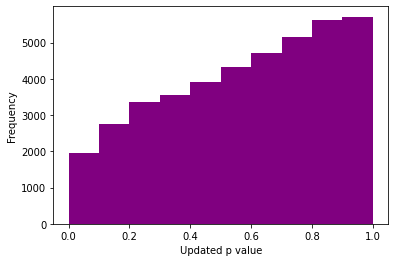

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

class ANOVAAnalysis:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path, delimiter='\t')
        self.data_list = self.data.iloc[:, 1:49].values.tolist()
        self.gene = self.data.iloc[:, 49:50].values.tolist()
        self.A = self.create_A_matrix()
        self.B = self.create_B_matrix()
        self.F = self.calculate_F_values()

    def create_A_matrix(self):
        A = np.zeros((48, 4))
        for i in range(4):
            for j in range(12):
                A[j + (i * 12)][i] = 1
        return np.matrix(A)
    
    def create_B_matrix(self):
        B = np.zeros((48, 4))
        for i in range(24):
            B[i][0] = 1
        for i in range(24):
            B[24 + i][1] = 1
        for i in range(12):
            B[i][2] = 1
        for i in range(12):
            B[i + 24][2] = 1
        for i in range(12):
            B[i + 12][3] = 1
        for i in range(12):
            B[i + 36][3] = 1
        return np.matrix(B)

    def calculate_F_values(self):
        F_values = []
        for j in self.data_list:
            i = np.matrix(j)
            temp = np.dot(np.dot(self.A, np.linalg.pinv(np.dot(self.A.T, self.A))), self.A.T)
            temp1 = np.dot(np.dot(self.B, np.linalg.pinv(np.dot(self.B.T, self.B))), self.B.T)
            temp2 = np.subtract(temp, temp1)
            numerator = np.dot(np.dot(i, temp2), i.T)
            I = np.identity(48)
            denominator = np.dot(np.dot(i, np.subtract(I, temp)), i.T)
            
            # Checking if denominator is very close to zero (avoiding division by nearly zero)
            if np.abs(denominator[0][0]) < 1e-10:
                val = np.nan
            else:
                val = float(numerator.item() / denominator.item()) * ((48 - np.linalg.matrix_rank(self.A)) / (np.linalg.matrix_rank(self.A) - np.linalg.matrix_rank(self.B)))

            F_values.append(val)
        return F_values


    def plot_histogram(self, color='purple'):
        one = 48 - np.linalg.matrix_rank(self.A)
        two = np.linalg.matrix_rank(self.A) - np.linalg.matrix_rank(self.B)
        p_values = 1 - stats.f.cdf(self.F, two, one)
        updated_p_values = [p for p in p_values if p < 1]
            
        plt.hist(updated_p_values, bins=10, color=color)
        plt.xlabel("Updated p value")
        plt.ylabel("Frequency")
        plt.savefig('histogram.png')
        plt.show()

if __name__ == "__main__":
    data_path = "./Data/Raw Data_GeneSpring.txt"
    analysis = ANOVAAnalysis(data_path)
    analysis.plot_histogram()


In [ ]:
|